Kolmogorov–Smirnov D statistic = 0.0803
p-value = 0.5130
Fail to reject the null hypothesis — the data MAY come from a uniform distribution.


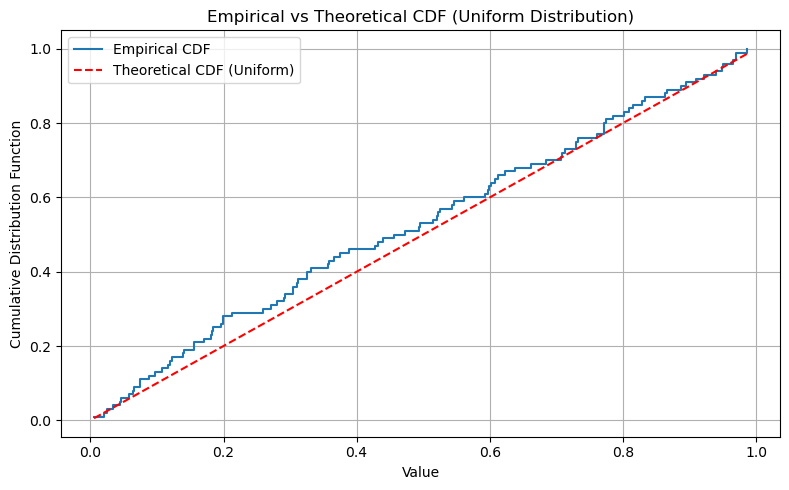

In [5]:
# Kolmogorov–Smirnov tests for:
# I - uniform distribution
# II - normal distribution

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# I - Kolmogorov-Smirnov test for UNIFORM DISTRIBUTION 

# 1. Generate data simulating "coin tosses"
# Let's assume we received data from a supposedly fair source
# Values should be uniformly distributed over [0, 1] for a fair coin
np.random.seed(42)  # for reproducibility
data = np.random.uniform(0, 1, 100)

# 2. Perform the Kolmogorov–Smirnov test (check if data follows uniform distribution)
D_statistic, p_value = stats.kstest(data, 'uniform')

# 3. Display the result
print(f"Kolmogorov–Smirnov D statistic = {D_statistic:.4f}")
print(f"p-value = {p_value:.4f}")

# 4. Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis — the data does NOT follow a uniform distribution.")
else:
    print("Fail to reject the null hypothesis — the data MAY come from a uniform distribution.")

# 5. Prepare data for plotting empirical vs theoretical CDF
sorted_data = np.sort(data)
n = len(data)
empirical_cdf = np.arange(1, n + 1) / n
theoretical_cdf = sorted_data  # for uniform distribution: F(x) = x

# 6. Plotting
plt.figure(figsize=(8, 5))
plt.step(sorted_data, empirical_cdf, label='Empirical CDF', where='post')
plt.plot(sorted_data, theoretical_cdf, 'r--', label='Theoretical CDF (Uniform)')
plt.xlabel('Value')
plt.ylabel('Cumulative Distribution Function')
plt.title('Empirical vs Theoretical CDF (Uniform Distribution)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Kolmogorov–Smirnov D statistic = 0.0508
p-value = 0.9467
Fail to reject the null hypothesis — the data appears to follow a normal distribution.


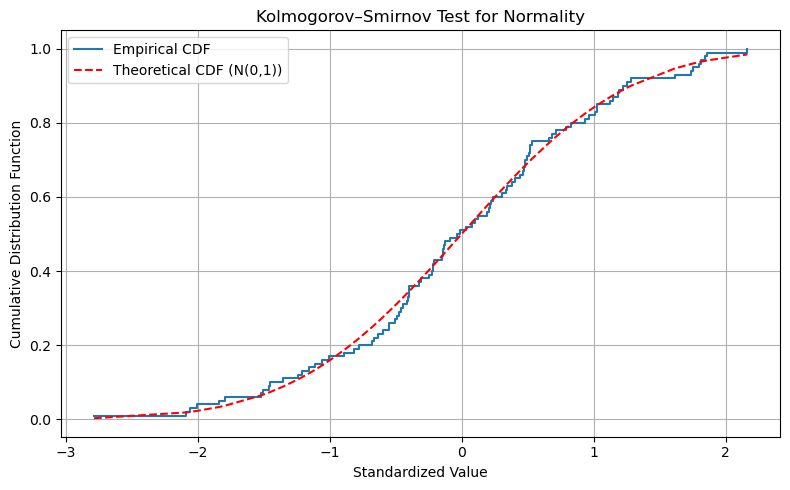

In [7]:
# II - Kolmogorov-Smirnov test for NORMAL DISTRIBUTION

# 1. Generate random data
# Example: data drawn from a normal distribution (mean = 0, std = 1)
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)

# 2. Normalize the data (when exact distribution parameters are unknown)
# In the KS test, standardization is recommended:
standardized_data = (data - np.mean(data)) / np.std(data)

# 3. Perform the Kolmogorov–Smirnov test
# Compare the standardized data against the standard normal distribution N(0, 1)
D_statistic, p_value = stats.kstest(standardized_data, 'norm')

# 4. Display the results
print(f"Kolmogorov–Smirnov D statistic = {D_statistic:.4f}")
print(f"p-value = {p_value:.4f}")

# 5. Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis — the data does NOT follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis — the data appears to follow a normal distribution.")

# 6. Prepare data for CDF plot
sorted_data = np.sort(standardized_data)
n = len(standardized_data)
empirical_cdf = np.arange(1, n + 1) / n
theoretical_cdf = stats.norm.cdf(sorted_data)  # standard normal CDF

# 7. Plot empirical vs theoretical CDF
plt.figure(figsize=(8, 5))
plt.step(sorted_data, empirical_cdf, label='Empirical CDF', where='post')
plt.plot(sorted_data, theoretical_cdf, 'r--', label='Theoretical CDF (N(0,1))')
plt.xlabel('Standardized Value')
plt.ylabel('Cumulative Distribution Function')
plt.title('Kolmogorov–Smirnov Test for Normality')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()